**Purpose**: Explores scaling effects in a specific domain (music-related sentences)
- Uses music-focused sentences about guitar playing and performances
- Applies random dimension-wise scaling (0.1 to 10 range)
- Demonstrates how domain-specific semantic relationships are preserved/altered
- Uses pre-trained all-MiniLM-L6-v2 model
- Shows more realistic use case with domain-specific queries

In [1]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns


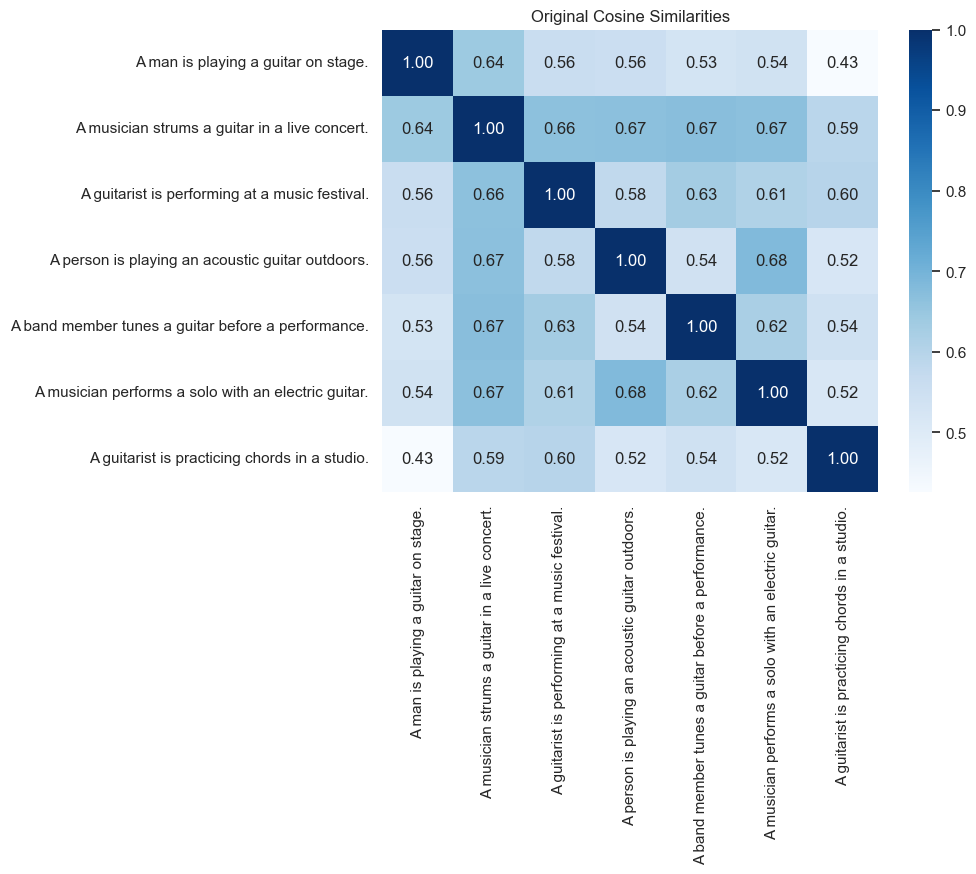

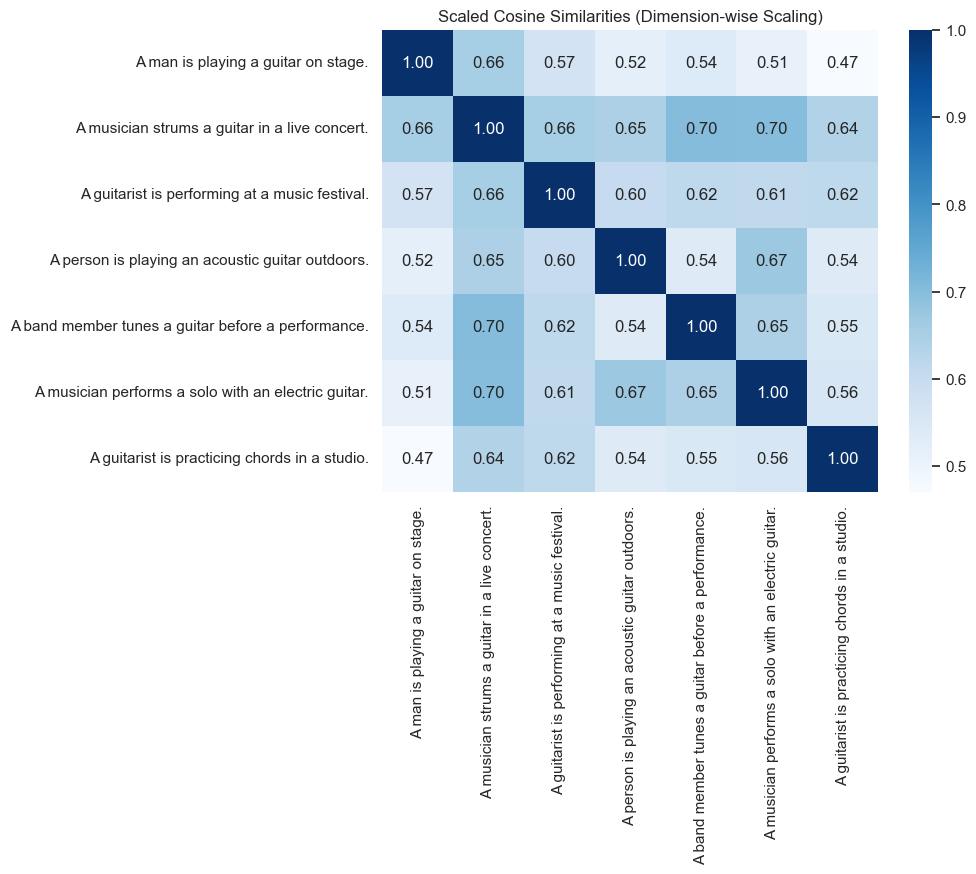

Ranking before scaling:
Sentence: A musician performs a solo with an electric guitar., Score: 0.7027
Sentence: A person is playing an acoustic guitar outdoors., Score: 0.6846
Sentence: A musician strums a guitar in a live concert., Score: 0.6082
Sentence: A band member tunes a guitar before a performance., Score: 0.5871
Sentence: A man is playing a guitar on stage., Score: 0.5540
Sentence: A guitarist is performing at a music festival., Score: 0.5416
Sentence: A guitarist is practicing chords in a studio., Score: 0.4521

Ranking after scaling:
Sentence: A musician performs a solo with an electric guitar., Score: 0.7024
Sentence: A person is playing an acoustic guitar outdoors., Score: 0.6892
Sentence: A musician strums a guitar in a live concert., Score: 0.6002
Sentence: A band member tunes a guitar before a performance., Score: 0.5704
Sentence: A guitarist is performing at a music festival., Score: 0.5605
Sentence: A man is playing a guitar on stage., Score: 0.5452
Sentence: A guitari

In [3]:

# Load the pretrained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = [
    "A man is playing a guitar on stage.",
    "A musician strums a guitar in a live concert.",
    "A guitarist is performing at a music festival.",
    "A person is playing an acoustic guitar outdoors.",
    "A band member tunes a guitar before a performance.",
    "A musician performs a solo with an electric guitar.",
    "A guitarist is practicing chords in a studio."
]

# Compute embeddings without initial normalization
original_embeddings = model.encode(sentences, normalize_embeddings=False)

# Compute original cosine similarities
original_cosine_similarities = util.cos_sim(original_embeddings, original_embeddings)

# Introduce more extreme and random scaling to embeddings
np.random.seed(42)  # For reproducibility
dimension_scaling = np.random.uniform(0.1, 10, original_embeddings.shape[1])
scaled_embeddings_dim = original_embeddings * dimension_scaling

# Compute scaled cosine similarities
scaled_cosine_similarities_dim = util.cos_sim(scaled_embeddings_dim, scaled_embeddings_dim)

# Define function to display similarity matrix
def display_similarity_matrix(similarity_matrix, title):
    sns.set(style='whitegrid')
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='Blues',
                xticklabels=sentences, yticklabels=sentences)
    plt.title(title)
    plt.show()

# Display original cosine similarities
display_similarity_matrix(original_cosine_similarities, "Original Cosine Similarities")

# Display scaled cosine similarities
display_similarity_matrix(scaled_cosine_similarities_dim, "Scaled Cosine Similarities (Dimension-wise Scaling)")

# Semantic search example
query = "A person is playing an instrument."
query_embedding = model.encode(query, normalize_embeddings=False)

# Apply dimension-wise scaling to query embedding
query_embedding_scaled = query_embedding * dimension_scaling

# Compute similarities before scaling
cosine_scores = util.cos_sim(query_embedding, original_embeddings)[0]
top_results = np.argsort(-cosine_scores)
print("Ranking before scaling:")
for idx in top_results:
    print(f"Sentence: {sentences[idx]}, Score: {cosine_scores[idx]:.4f}")

# Compute similarities after scaling
cosine_scores_scaled = util.cos_sim(query_embedding_scaled, scaled_embeddings_dim)[0]
top_results_scaled = np.argsort(-cosine_scores_scaled)
print("\nRanking after scaling:")
for idx in top_results_scaled:
    print(f"Sentence: {sentences[idx]}, Score: {cosine_scores_scaled[idx]:.4f}")